# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [5]:
cities

['coracao de jesus',
 'hithadhoo',
 'mar del plata',
 'ponta do sol',
 'port alfred',
 'vila velha',
 'batagay',
 'shaunavon',
 'omsukchan',
 'port lincoln',
 'clyde river',
 'hermanus',
 'kapaa',
 'hobart',
 'hirado',
 'mahebourg',
 'saldanha',
 'rikitea',
 'port elizabeth',
 'chifeng',
 'souillac',
 'castro',
 'brae',
 'jamestown',
 'tasiilaq',
 'cisternino',
 'severo-kurilsk',
 'torbay',
 'missoula',
 'bluff',
 'thompson',
 'vaini',
 'karatsu',
 'lata',
 'camopi',
 'east london',
 'victoria',
 'talnakh',
 'punta arenas',
 'mehran',
 'los llanos de aridane',
 'sungaipenuh',
 'bredasdorp',
 'lazaro cardenas',
 'saint-philippe',
 'attawapiskat',
 'sistranda',
 'bambous virieux',
 'barrow',
 'ushuaia',
 'ocampo',
 'atlantic beach',
 'mys shmidta',
 'atuona',
 'the valley',
 'taoudenni',
 'mandalgovi',
 'albany',
 'nazareno',
 'cockburn town',
 'barranca',
 'san cristobal',
 'mount gambier',
 'yulara',
 'norman wells',
 'hilo',
 'kaitangata',
 'bay roberts',
 'waipawa',
 'belushya guba',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#type(cities)

#### For reference - link to openweather api documentation: https://openweathermap.org/current

In [7]:
#Tested API calls on three citites list before trying with full list
#syntax: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

#Make api list into a smaller list
#test3=cities[0:3]
# test3

In [3]:
#API Info_cities list search url

base_url="http://api.openweathermap.org/data/2.5/weather?"

#Lists for dataframe
city_name_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lon_list=[]
max_temp_list=[]
windspeed_list=[]

#loop through test3
for city in cities:
    weather_response=requests.get(base_url + "appid=" + weather_api_key + "&q=" + city + "&units=Imperial")
    weather_data=weather_response.json()
    #pprint(weather_data)
    try:
        city_name_list.append(weather_data['name'])
        cloudiness_list.append(weather_data['clouds']['all'])
        country_list.append(weather_data['sys']['country'])
        date_list.append(weather_data['dt'])
        humidity_list.append(weather_data['main']['humidity'])
        lat_list.append(weather_data['coord']['lat'])
        lon_list.append(weather_data['coord']['lon'])
        max_temp_list.append(weather_data['main']['temp_max'])
        windspeed_list.append(weather_data['wind']['speed'])
        print(f"{city} found! Appending data.")
    except:
        print("City not found. No data appended.")
        pass

hilo found! Appending data.
sumbe found! Appending data.
rikitea found! Appending data.
sorland found! Appending data.
lebu found! Appending data.
punta arenas found! Appending data.
buraydah found! Appending data.
busselton found! Appending data.
umm kaddadah found! Appending data.
kruisfontein found! Appending data.
hami found! Appending data.
upernavik found! Appending data.
tura found! Appending data.
kungurtug found! Appending data.
seoul found! Appending data.
mataura found! Appending data.
nioaque found! Appending data.
bengkulu found! Appending data.
qaanaaq found! Appending data.
port elizabeth found! Appending data.
yaan found! Appending data.
verkhnyaya inta found! Appending data.
mbekenyera found! Appending data.
severo-kurilsk found! Appending data.
shimoda found! Appending data.
City not found. No data appended.
new norfolk found! Appending data.
City not found. No data appended.
pailon found! Appending data.
maniitsoq found! Appending data.
tuktoyaktuk found! Appending d

tokonou found! Appending data.
qaqortoq found! Appending data.
urumqi found! Appending data.
bambous virieux found! Appending data.
City not found. No data appended.
biak found! Appending data.
revelstoke found! Appending data.
carnarvon found! Appending data.
chiredzi found! Appending data.
kasongo-lunda found! Appending data.
tygda found! Appending data.
mahebourg found! Appending data.
portales found! Appending data.
sal rei found! Appending data.
anadyr found! Appending data.
tuatapere found! Appending data.
torbay found! Appending data.
evensk found! Appending data.
la ronge found! Appending data.
hithadhoo found! Appending data.
xingyi found! Appending data.
san patricio found! Appending data.
verkhovazhye found! Appending data.
nanzhang found! Appending data.
quatre cocos found! Appending data.
naze found! Appending data.
padang found! Appending data.
suncuius found! Appending data.
City not found. No data appended.
nijar found! Appending data.
green valley found! Appending data

nalut found! Appending data.
chara found! Appending data.
vardo found! Appending data.
ahuimanu found! Appending data.
moroni found! Appending data.
bijar found! Appending data.
uvat found! Appending data.
port-gentil found! Appending data.
chenzhou found! Appending data.
gibara found! Appending data.
usoke found! Appending data.
City not found. No data appended.
City not found. No data appended.
filadelfia found! Appending data.
manjeshwar found! Appending data.
carman found! Appending data.
tucumcari found! Appending data.
dutlwe found! Appending data.
henties bay found! Appending data.
coihaique found! Appending data.
City not found. No data appended.
marau found! Appending data.
ferrol found! Appending data.
pingzhuang found! Appending data.
viedma found! Appending data.
cherskiy found! Appending data.
wahpeton found! Appending data.
City not found. No data appended.
City not found. No data appended.
roanoke rapids found! Appending data.
marawi found! Appending data.
janoshalma fou

In [ ]:
#pprint(weather_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Display dataframe
weather_df=pd.DataFrame({
    "City Name": city_name_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lon_list,
    "Max Temp": max_temp_list,
    "Windspeed": windspeed_list    
})
weather_df

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,Hilo,90,US,1611978982,73,19.7297,-155.0900,75.20,6.91
1,Sumbe,100,AO,1611979427,81,-11.2061,13.8437,73.76,3.33
2,Rikitea,24,PF,1611979228,72,-23.1203,-134.9692,80.19,9.82
3,Sørland,20,NO,1611979427,74,67.6670,12.6934,23.00,2.30
4,Lebu,96,CL,1611979281,90,-37.6167,-73.6500,56.89,6.08
5,Punta Arenas,40,CL,1611979245,81,-53.1500,-70.9167,46.40,20.71
6,Buraidah,0,SA,1611979428,71,26.3260,43.9750,48.20,4.61
7,Busselton,0,AU,1611979254,41,-33.6500,115.3333,82.99,4.00
8,Umm Kaddadah,0,SD,1611979428,32,13.6017,26.6876,59.14,18.01
9,Kruisfontein,0,ZA,1611979391,91,-34.0033,24.7314,55.00,4.23


In [5]:
#export to csv
weather_df.to_csv('output_data/cities.csv', header=True, index=True, index_label='City Number')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
count,543.000000,5.430000e+02,543.000000,543.000000,543.000000,543.000000,543.000000
mean,53.823204,1.611979e+09,73.987109,21.201288,18.867920,47.461400,8.338508
std,39.545458,1.076693e+02,19.033129,33.479130,92.793173,33.813113,5.704009
min,0.000000,1.611979e+09,16.000000,-54.800000,-179.166700,-44.090000,0.200000
25%,6.000000,1.611979e+09,65.000000,-7.161250,-66.241050,25.740000,3.890000
50%,66.000000,1.611979e+09,79.000000,25.901800,20.583300,59.000000,6.910000
75%,90.000000,1.611980e+09,87.000000,48.491650,101.884550,75.010000,11.530000
max,100.000000,1.611980e+09,100.000000,78.218600,179.316700,107.600000,34.520000


In [7]:
weather_df.loc[weather_df['Humidity']>100,:] #Confirms there are no cities with humidity >100%

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# NA because there are no cities with humidity over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# NA because a new dataframe is not needed - using same dataframe (weather_df)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
weather_df.head(1)

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,Hilo,90,US,1611978982,73,19.7297,-155.09,75.2,6.91


## Latitude vs. Temperature Plot

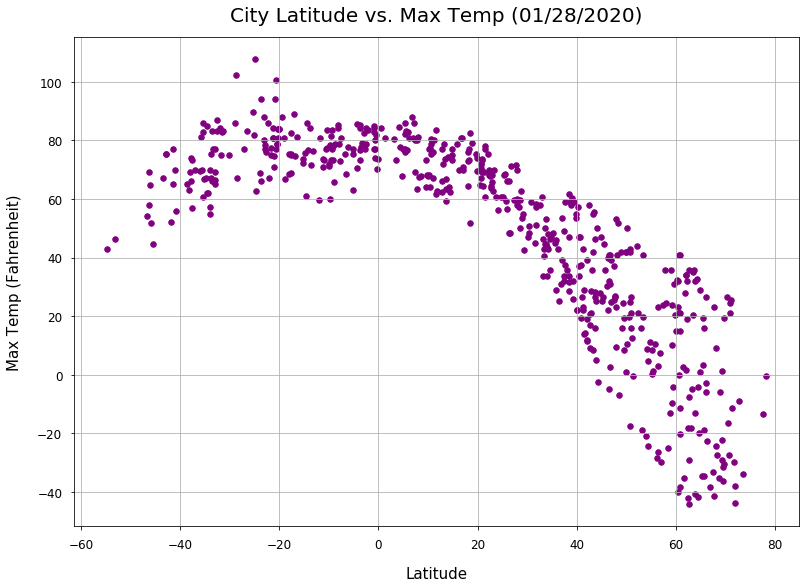

In [9]:
# Build Scatter plot
plt.figure(figsize=(13,9))
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", c="purple", s=30)
plt.title("City Latitude vs. Max Temp (01/28/2020)", fontsize=20, y=1.02)
plt.ylabel("Max Temp (Fahrenheit)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Lat_vs_Temp.png')

# Show plot
plt.show()

### Observations of Latitude vs. Temperature:


## Latitude vs. Humidity Plot

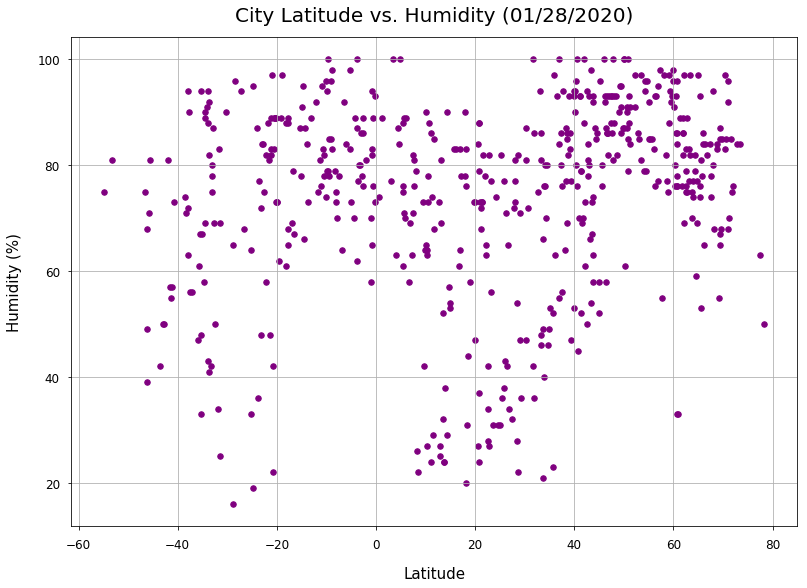

In [10]:
# Build Scatter plot
plt.figure(figsize=(13,9))
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", c="purple", s=30)
plt.title("City Latitude vs. Humidity (01/28/2020)", fontsize=20, y=1.02)
plt.ylabel("Humidity (%)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)


# Save figure to .png
plt.savefig('output_data/Lat_vs_Humidity.png')

# Show plot
plt.show()

### Observations of Latitude vs. Humidity:



## Latitude vs. Cloudiness Plot

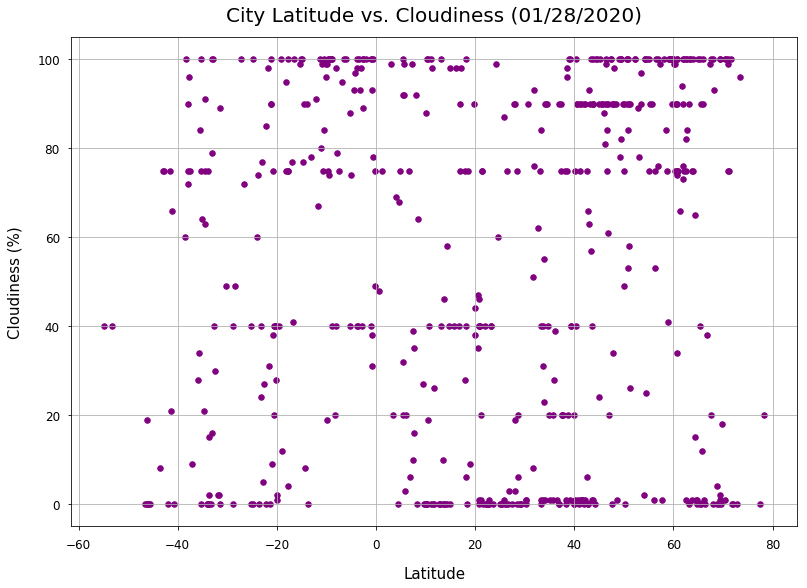

In [11]:
# Build Scatter plot
plt.figure(figsize=(13,9))
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", c="purple", s=30)
plt.title("City Latitude vs. Cloudiness (01/28/2020)", fontsize=20, y=1.02)
plt.ylabel("Cloudiness (%)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Lat_vs_Cloudiness.png')

# Show plot
plt.show()

### Observations of Latitude vs. Cloudiness:



## Latitude vs. Wind Speed Plot

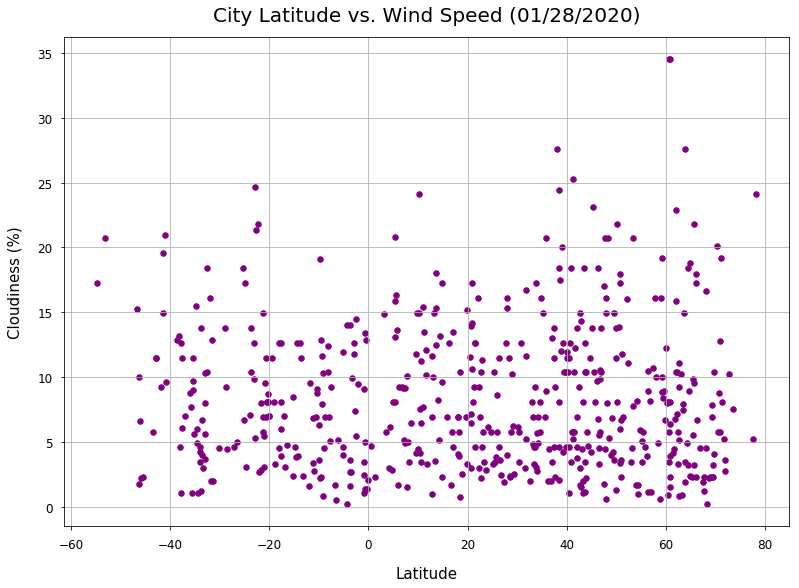

In [12]:
# Build Scatter plot
plt.figure(figsize=(13,9))
plt.scatter(weather_df['Lat'], weather_df['Windspeed'], marker="o", c="purple", s=30)
plt.title("City Latitude vs. Wind Speed (01/28/2020)", fontsize=20, y=1.02)
plt.ylabel("Cloudiness (%)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Lat_vs_Windspeed.png')

# Show plot
plt.show()

### Observations of Latitude vs. Wind Speed:



## Linear Regression

In [13]:
weather_df.head(1)

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,Hilo,90,US,1611978982,73,19.7297,-155.09,75.2,6.91


In [22]:
# break apart weather_df to one df for northern hemisphere and one for southern hemisphere

nh_df=weather_df.loc[weather_df['Lat']>=0,:]
#nh_df.describe()
sh_df=weather_df.loc[weather_df['Lat']<0,:]
#sh_df.describe()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

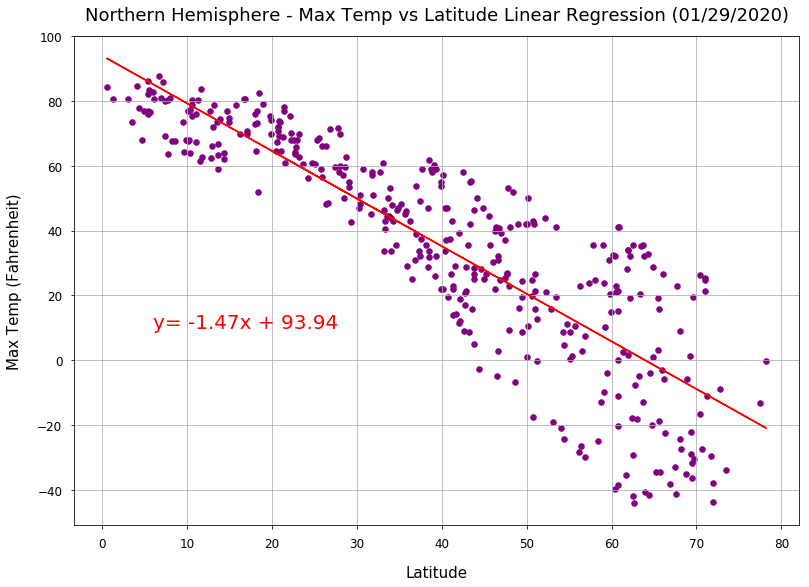

In [57]:
# Build Scatter plot
x_values=nh_df['Lat']
y_values=nh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=20, color='red')
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Max Temp (Fahrenheit)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_NH_Lat_vs_Temp.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:



###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

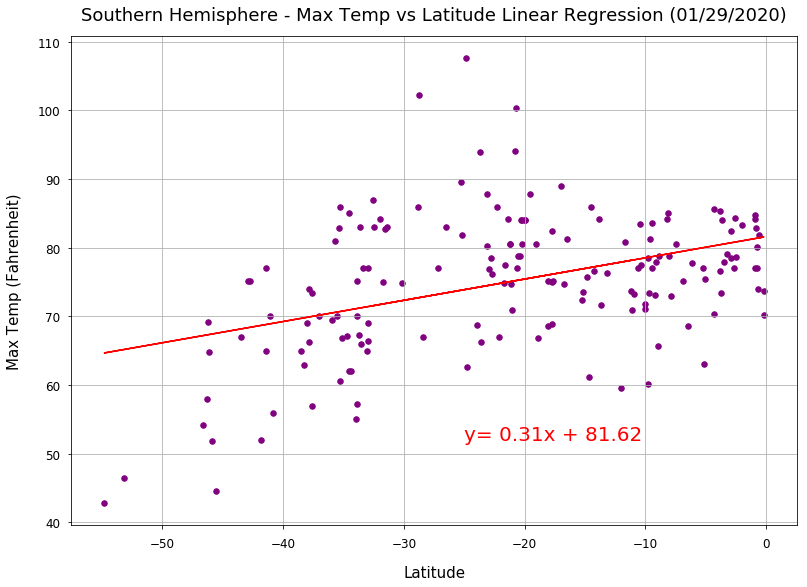

In [56]:
# Build Scatter plot
x_values=sh_df['Lat']
y_values=sh_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,52), fontsize=20, color='red')
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Max Temp (Fahrenheit)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_SH_Lat_vs_Temp.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:



###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

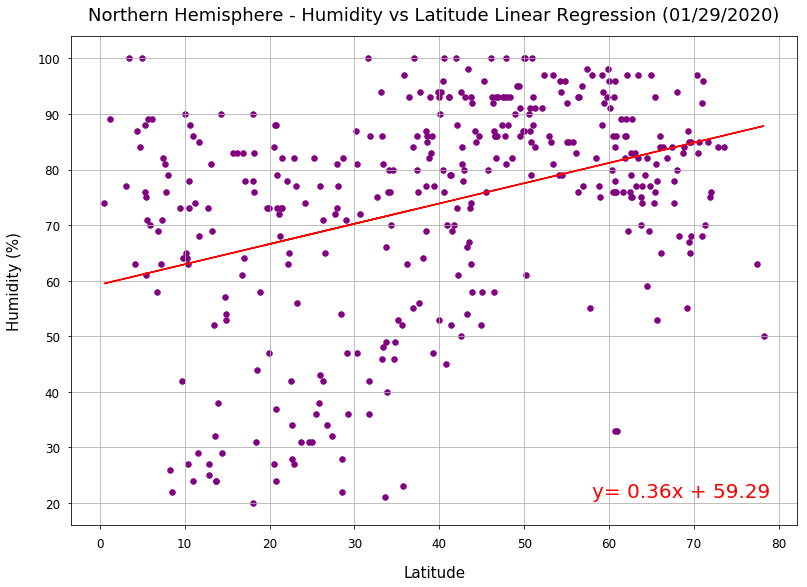

In [60]:
# Build Scatter plot
x_values=nh_df['Lat']
y_values=nh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(58,21), fontsize=20, color='red')
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Humidity (%)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_NH_Lat_vs_Humidity.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

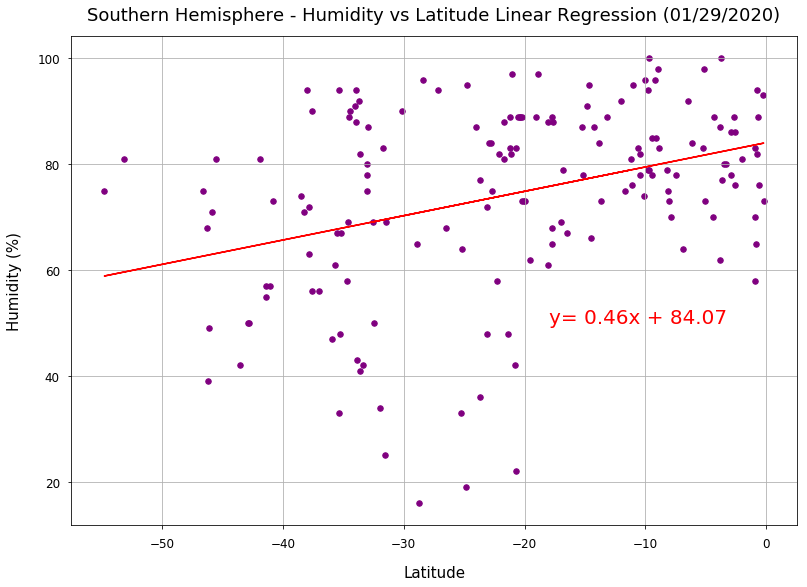

In [64]:
# Build Scatter plot
x_values=sh_df['Lat']
y_values=sh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-18,50), fontsize=20, color='red')
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Humidity (%)", fontsize=15, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_SH_Lat_vs_Humidity.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

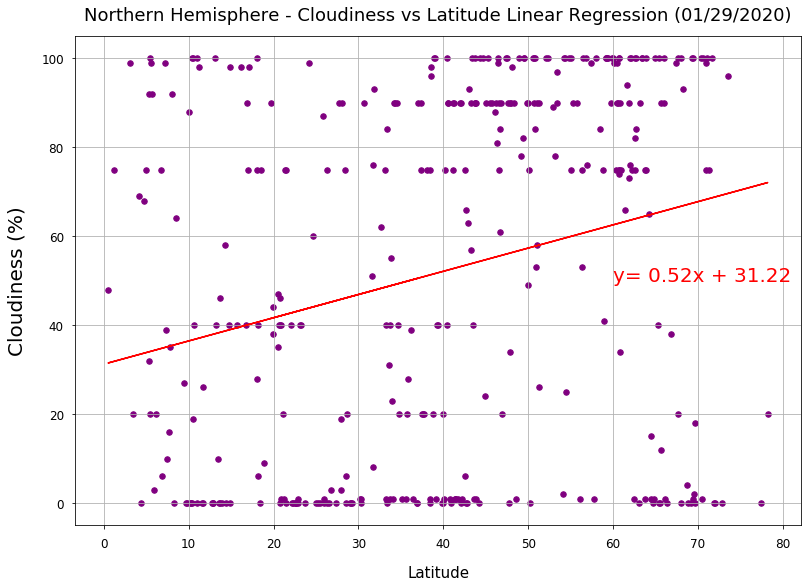

In [62]:
# Build Scatter plot
x_values=nh_df['Lat']
y_values=nh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(60,50), fontsize=20, color='red')
plt.title("Northern Hemisphere - Cloudiness vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Cloudiness (%)", fontsize=20, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_NH_Lat_vs_Cloudiness.png')

# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

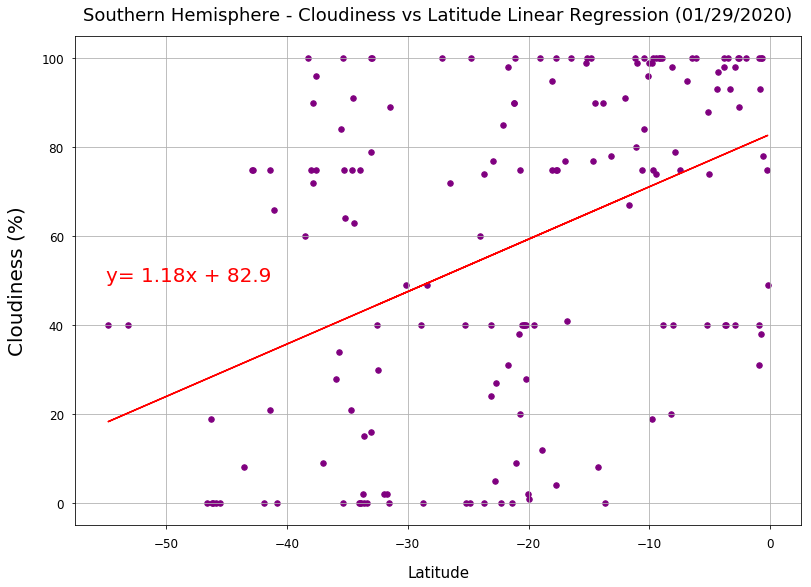

In [66]:
# Build Scatter plot
x_values=sh_df['Lat']
y_values=sh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,50), fontsize=20, color='red')
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Cloudiness (%)", fontsize=20, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_SH_Lat_vs_Cloudiness.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

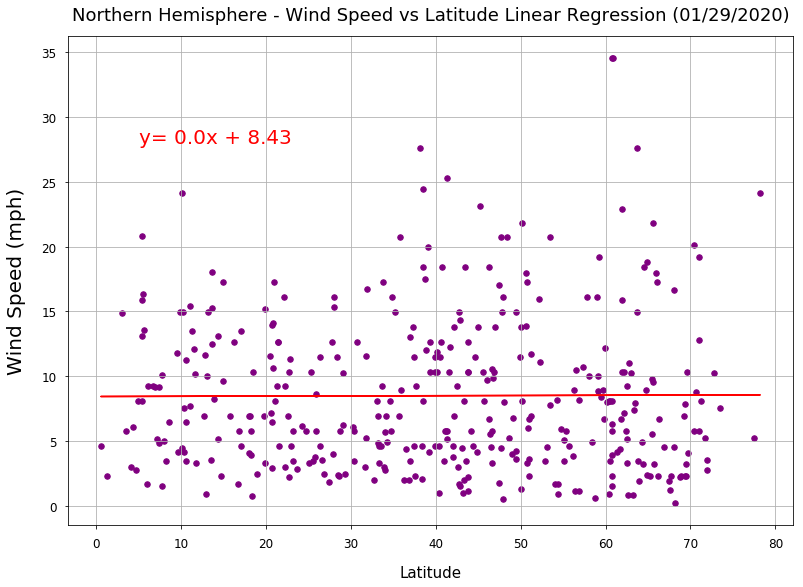

In [70]:
# Build Scatter plot
x_values=nh_df['Lat']
y_values=nh_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,28), fontsize=20, color='red')
plt.title("Northern Hemisphere - Wind Speed vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Wind Speed (mph)", fontsize=20, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_NH_Lat_vs_Windspeed.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling:

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

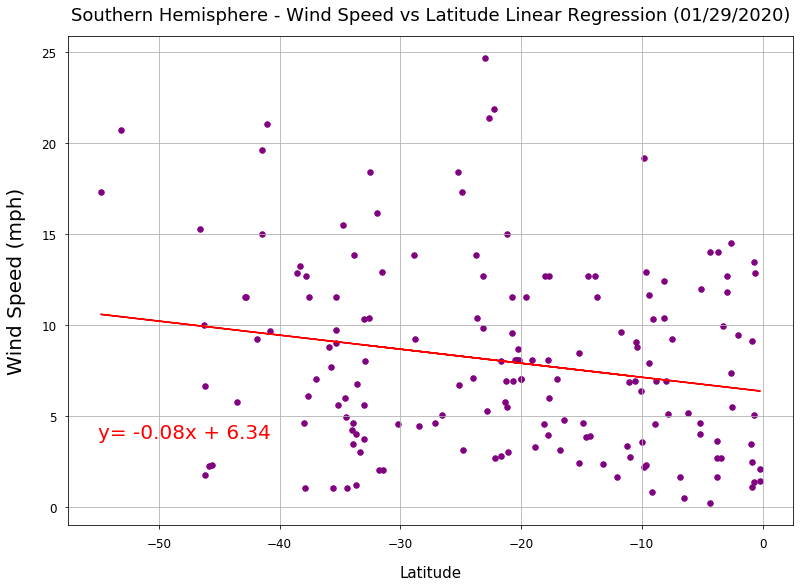

In [74]:
# Build Scatter plot
x_values=sh_df['Lat']
y_values=sh_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,3.75), fontsize=20, color='red')
plt.title("Southern Hemisphere - Wind Speed vs Latitude Linear Regression (01/29/2020)", fontsize=18, y=1.02)
plt.ylabel("Wind Speed (mph)", fontsize=20, labelpad=15)
plt.xlabel("Latitude", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('output_data/Line_Regress_SH_Lat_vs_Windspeed.png')

# Show plot
plt.show()

### The linear regression in the chart above is modeling: